In [1]:
#suppressing the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# reading the csv file 
df=pd.read_csv("advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
# checking the shape of the dataset
df.shape

(200, 4)

In [5]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
# statistical summary of the numeric columns
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot: ylabel='Sales'>

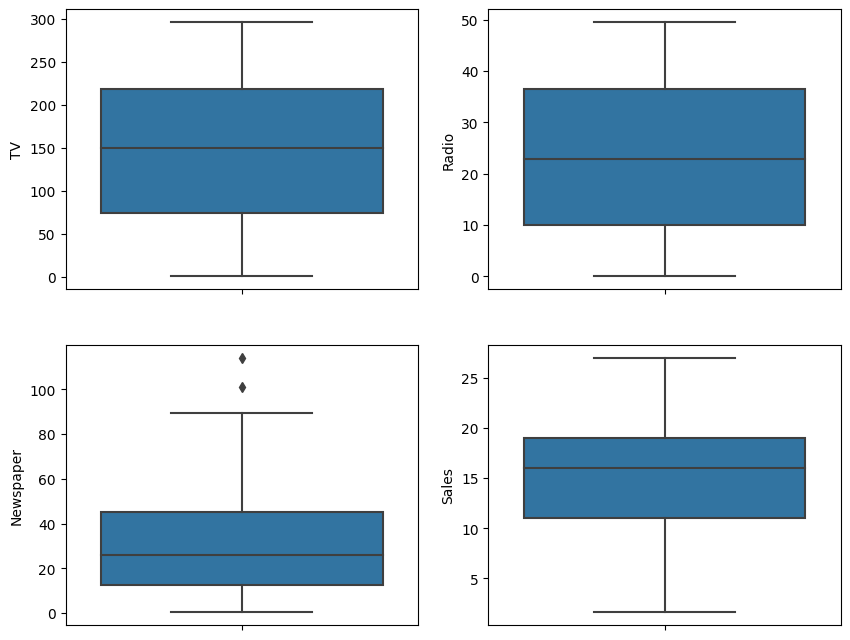

In [7]:
# visualizing the data
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2,figsize=(10,8))
sns.boxplot(data=df,y="TV",ax=ax1)
sns.boxplot(data=df,y="Radio",ax=ax2)
sns.boxplot(data=df,y="Newspaper",ax=ax3)
sns.boxplot(data=df,y="Sales",ax=ax4)

<AxesSubplot: xlabel='TV', ylabel='Sales'>

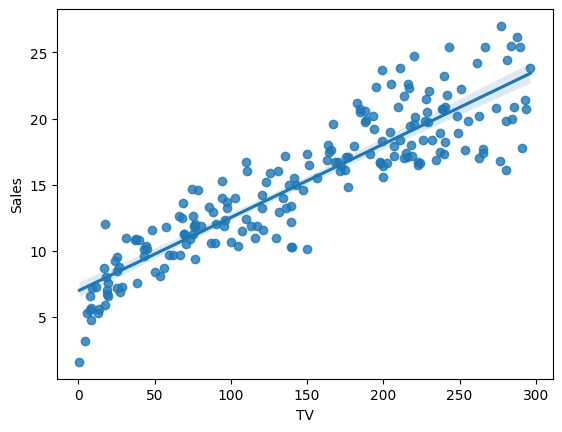

In [8]:
sns.regplot(x="TV",y="Sales",data=df)

<AxesSubplot: xlabel='Newspaper', ylabel='Sales'>

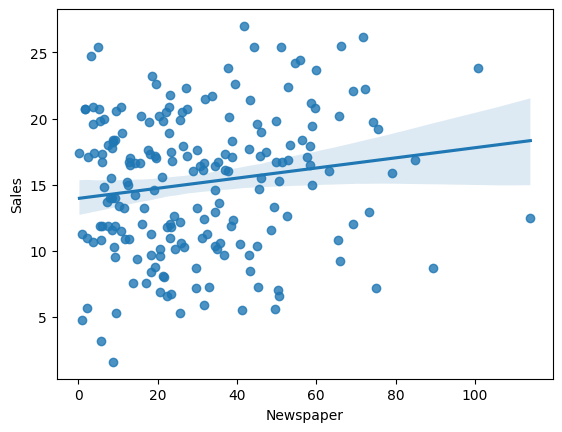

In [9]:
sns.regplot(x="Newspaper",y="Sales",data=df)

<AxesSubplot: xlabel='Radio', ylabel='Sales'>

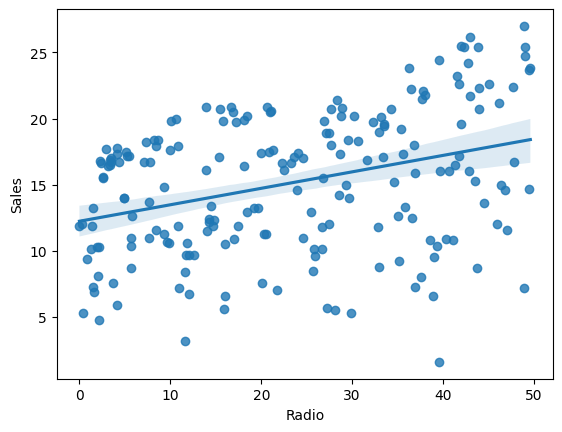

In [10]:
sns.regplot(data=df,x="Radio",y="Sales")

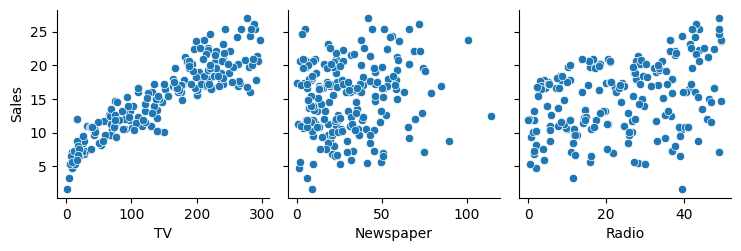

In [11]:
%matplotlib inline
sns.pairplot(data=df,x_vars=["TV","Newspaper","Radio"],y_vars=["Sales"])

In [12]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<AxesSubplot: >

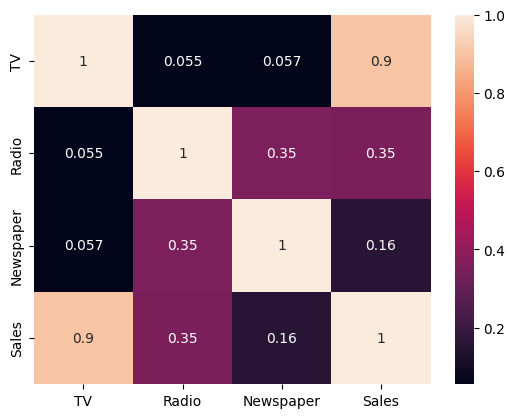

In [109]:
sns.heatmap(df.corr(),annot=True)

In [112]:
# Steps involved in model development 

# 1. Create Train and test set with the ratio of 70-30 or 80-20
# 2. Train the model on the train set 
# 3. Residual Analysis 
# 4. Evaluate the model by using test set 


In [97]:
import statsmodels
import statsmodels.api as sm
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [19]:
#Create X and Y
X=df["TV"]
y=df["Sales"]

In [46]:
#Create Train sets and Test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=100)

In [48]:
X_train

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
       ...  
87     110.7
103    187.9
67     139.3
24      62.3
8        8.6
Name: TV, Length: 140, dtype: float64

In [52]:
#Training the model
X_train_sm=sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [54]:
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.params
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           1.52e-52
Time:                        09:10:48   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
y_train_pred=lr_model.predict(X_train_sm)

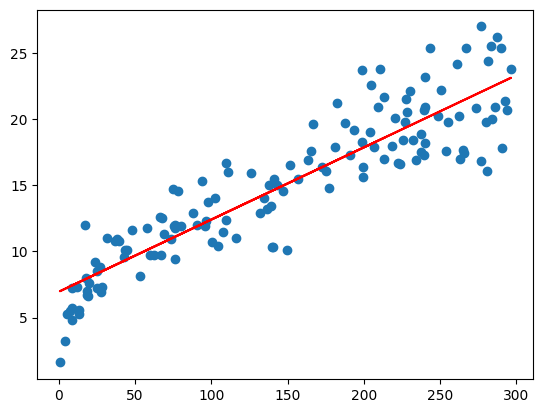

In [69]:
plt.scatter(X_train,y_train)
plt.plot(X_train,y_train_pred,'r')

In [70]:
res=y_train-y_train_pred

Text(0.5, 1.0, 'Residual plot')

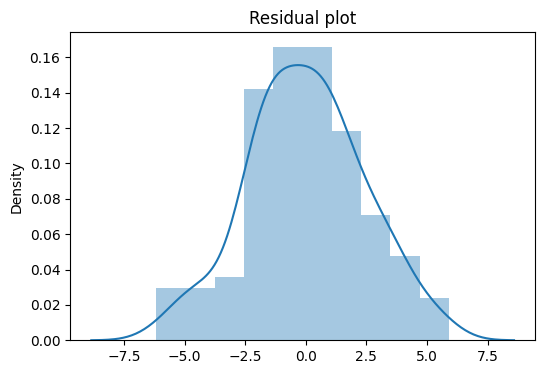

In [84]:
plt.figure(figsize=(6,4))
sns.distplot(res)
plt.title("Residual plot")


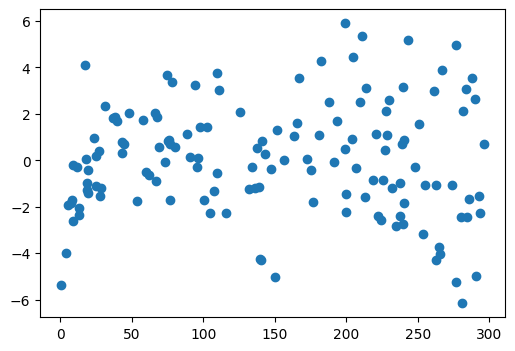

In [87]:
# look for patterns in the scatter plot
plt.figure(figsize=(6,4))
plt.scatter(X_train,res)

In [88]:
# evaluating the model

In [92]:
X_test_sm=sm.add_constant(X_test)

In [98]:
y_test_pred=lr_model.predict(X_test_sm)
r2_score(y_true=y_test,y_pred=y_test_pred)


0.792103160124566

In [99]:
r2_score(y_true=y_train,y_pred=y_train_pred)

0.8157933136480389

In [100]:
mean_squared_error(y_true=y_test,y_pred=y_test_pred)

4.077556371826953

In [101]:
mean_squared_error(y_true=y_train,y_pred=y_train_pred)

5.752400386486836

In [102]:
# r-squared value for test  = 0.7921 or 79.21 %
# r-squared value for train = 0.8157 or 81.57 %

# mean-squared value for test = 4.077
# mean-squared value for train = 5.752


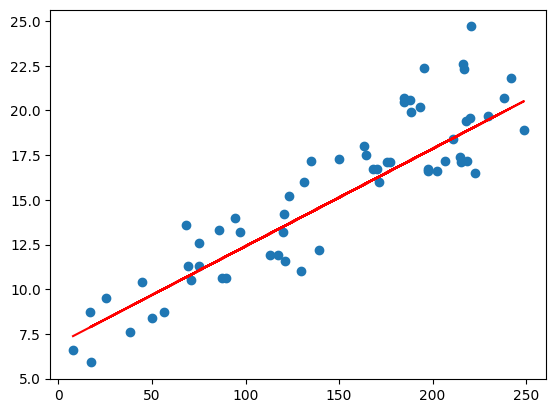

In [108]:
# Also plotting graph for test set
plt.scatter(X_test,y_test)
plt.plot(X_test,y_test_pred,'r')